# Clasificación de superhéroes

### Objetivo:

Este dataset tiene un objetivo más didáctico y esperamos poder obtener de él, una clasificación adecuada de superhéroes pertenecientes a Marvel Comics y a DC Comics. 

Utilizaré un algotirmo de clasificación llamado Árboles de Decisión y, si no le va muy bien, probaré con otros modelos como Random Forest, Gradient Boosting Machine (GBM) y Support Vector Machine (SVM).

Conoceremos algunos datos curiosos sobre este dataset y conoceremos qué tan bien hemos clasificado a nuestros superhéroes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import graphviz
import scikitplot as skplt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

### Leemos las dos tablas que vamos a utilizar

In [2]:
df = pd.read_csv('proyecto/archive_superheroes/heroes_information.csv')
df2 = pd.read_csv('proyecto/archive_superheroes/super_hero_powers.csv')

## Diccionario de variables

|Variable| Descripción|
|---------|------------|
|#| Id|
|name| Nombre del superhéroe|
|Gender| Género del superhéroe (Male, Female)|
|Eye color| Color de ojos|
|Race| Raza|
|Hair color| Color de cabello|
|Height| Altura (cm)|
|Publisher| Publicante (Marvel o DC)|
|Skin color| Color de piel|
|Alignment| Bando (good, bad)|
|Weight| Peso (libras)|
|super_hero_powers| 168 variables sobre los diferentes tipos de superpoderes que tienen los superhéroes (True, False)|

In [3]:
df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


#### Vamos a convertir las columnas de altura y peso a metros y kilogramos respectivamente

In [4]:
df['Weight'] = df['Weight'] * 0.453592
df['Height'] = df['Height'] / 100

In [5]:
df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,2.03,Marvel Comics,-,good,200.034072
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,1.91,Dark Horse Comics,blue,good,29.483480
2,2,Abin Sur,Male,blue,Ungaran,No Hair,1.85,DC Comics,red,good,40.823280
3,3,Abomination,Male,green,Human / Radiation,No Hair,2.03,Marvel Comics,-,bad,200.034072
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-0.99,Marvel Comics,-,bad,-44.905608


In [6]:
df.columns

Index(['Unnamed: 0', 'name', 'Gender', 'Eye color', 'Race', 'Hair color',
       'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [7]:
df2.columns

Index(['hero_names', 'Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=168)

### Se hace el merge de las dos tablas

In [8]:
df_merge = pd.merge(df, df2, left_on='name', right_on='hero_names')

In [9]:
# Se elimina la columna indice 'Unnamed: 0' pues python ya nos la proporciona y por eso la tenemos duplicada
df_merge = df_merge.drop(columns = 'Unnamed: 0')

In [10]:
df_merge.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,2.03,Marvel Comics,-,good,200.034072,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,1.91,Dark Horse Comics,blue,good,29.483480,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,1.85,DC Comics,red,good,40.823280,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,2.03,Marvel Comics,-,bad,200.034072,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-0.99,Marvel Comics,-,bad,-44.905608,...,False,False,False,False,False,False,False,False,False,False


### Al graficar los publicantes de los diferentes superhéroes, vemos que hay muchos otros publicantes aparte de DC y Marvel

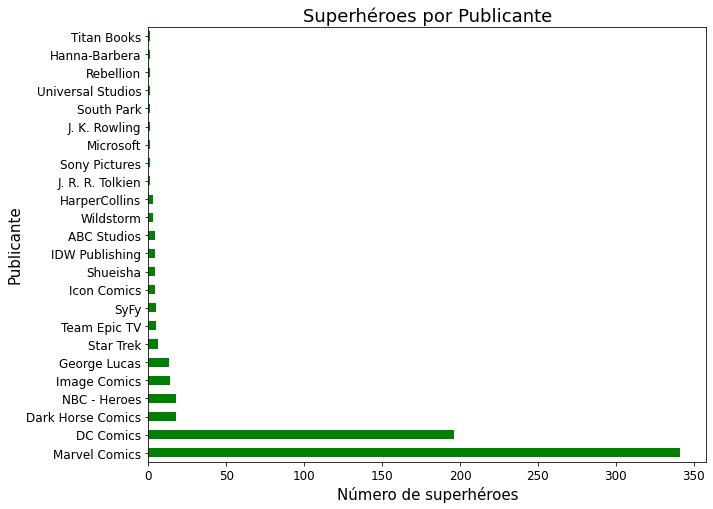

In [11]:
df_merge['Publisher'].value_counts().plot.barh(figsize = (10,8), 
                                               color = 'green')
plt.ylabel('Publicante', fontsize = 15)
plt.xlabel('Número de superhéroes', fontsize = 15)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.title('Superhéroes por Publicante', fontsize = 18);

### Como sólo nos importan los superhéroes de DC y de Marvel, vamos a eliminar a todos los demás.

In [12]:
# Aplicamos un filtro con numpy para ubicar solo los superheroes de DC y Marvel
mask = (df_merge['Publisher'] == 'DC Comics') | (df_merge['Publisher'] == 'Marvel Comics')
df_master = df_merge.iloc[np.where(mask)]
df_master.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,2.03,Marvel Comics,-,good,200.034072,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,1.85,DC Comics,red,good,40.823280,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,2.03,Marvel Comics,-,bad,200.034072,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-0.99,Marvel Comics,-,bad,-44.905608,...,False,False,False,False,False,False,False,False,False,False
5,Absorbing Man,Male,blue,Human,No Hair,1.93,Marvel Comics,-,bad,55.338224,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Reseteamos el indice del df, al elimiar registros, se perdio el orden
df_master = df_master.reset_index(drop=True)

In [14]:
# se verifica que no existan datos duplicados
df_master.duplicated().value_counts()

False    537
dtype: int64

In [15]:
# Contamos los datos nulos por columna
null_columns = df_master.columns[df_master.isnull().any()]
df_master[null_columns].isnull().sum()

Series([], dtype: float64)

In [16]:
# Imprimimos los nulos en un df
# df_master[pd.isnull(df_master['Publisher'])]
# como nos limitamos desde el principio a Marvel y Dc, ya no hay nulos

In [17]:
# Obtenemos las columnas que tienen registros con '-', pueden significar algo pero lo veremos despues
for i in df_master.columns:
    j = len(df_master[df_master[i] == '-'])
    if j > 0:
        print(i, j)

Gender 16
Eye color 58
Race 193
Hair color 58
Skin color 480
Alignment 4


### Este es el total de superhéroes con los que nos quedamos de Marvel y de DC

In [18]:
# En cantidad
df_master.Publisher.value_counts()

Marvel Comics    341
DC Comics        196
Name: Publisher, dtype: int64

In [19]:
# En porcentaje
df_master.Publisher.value_counts(normalize = True) * 100

Marvel Comics    63.500931
DC Comics        36.499069
Name: Publisher, dtype: float64

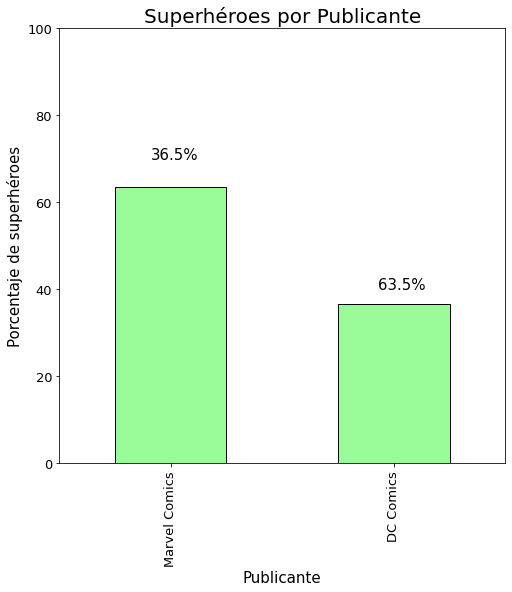

In [20]:
(df_master['Publisher'].value_counts(normalize = True)* 100).plot(kind = 'bar', figsize = (8,8), 
                                                                  color = 'palegreen',
                                                                  edgecolor = 'black')
plt.xlabel('Publicante', fontsize = 15)
plt.ylabel('Porcentaje de superhéroes', fontsize = 15)
plt.title('Superhéroes por Publicante', fontsize = 20)
plt.text(.93,40, '63.5%', fontsize = 15)
plt.text(-0.09,70,'36.5%', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.ylim(0,100);

### Y únicamente para conocer sus características:

Si aplicamos un "describe", obtenemos los estadísticos básicos de las variables numéricas que hay en nuestro DataFrame. Si observamos la altura, apreciamos que el máximo es de 9.75 metros y el mínimo es de -0.99. Este último puede ser de un superhéroe que puede cambiar de tamaño a voluntad. También nos damos cuenta que la media está muy por debajo de la mediana. Parece que algunos outliers están afectando...lo veremos más adelante.

En cuanto al peso también tenemos un valor negativo, probablemente sea debido a alguien que puede cambiar su masa o que sea muy pequeño. En este caso la media no es muy diferente de la mediana, es decir, si hay outliers, no nos están afectando mucho.

In [21]:
df_master.describe()

,Height,Weight
count,537.00000,537.000000
mean,1.38378,33.843707
std,1.22400,58.168957
min,-0.99000,-44.905608
25%,1.65000,23.586784
50%,1.80000,34.926584
75%,1.88000,44.905608
max,9.75000,408.232800


#### A continuación, veremos el porcentaje de hombres y mujeres por publicante. Hay algunos superhéroes asexuados que aparecen como '-'.

In [22]:
# Obtenemos el porcentaje de cada genero
(df_master.groupby(df_master.Publisher).Gender.value_counts(normalize = True)*100)

Publisher      Gender
DC Comics      Male      71.938776
               Female    27.551020
               -          0.510204
Marvel Comics  Male      66.568915
               Female    29.032258
               -          4.398827
Name: Gender, dtype: float64

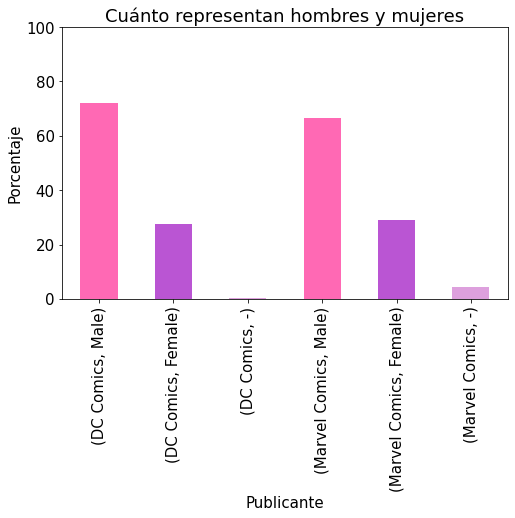

In [23]:
(df_master.groupby(df_master.Publisher).Gender.value_counts(normalize = True)*100).plot(kind = 'bar', 
                                                                                        figsize = (8,5), 
                                                                                        color = ['hotpink', 'mediumorchid', 'plum'])
plt.title('Cuánto representan hombres y mujeres', fontsize = 18)
plt.ylabel('Porcentaje', fontsize = 15)
plt.xlabel('Publicante', fontsize = 15)
plt.ylim(0,100)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15);

La mayoría de los superhéroes son hombres. Quizá muchos fueron creados en una época un poco más machista.

Además, vemos que los asexuados son, en casi su totalidad, pertenecientes a Marvel, por lo que si decidimos crear un personaje asexuado, ya sabemos a quién vendérselo.

### Ahora veamos cuál es el bando común para los superhéroes de cada publicante.

In [24]:
# Obtenemos el porcentaje de los bandos por publicante
(df_master.groupby(df_master.Publisher).Alignment.value_counts(normalize = True)*100)

Publisher      Alignment
DC Comics      good         64.795918
               bad          28.061224
               neutral       6.632653
               -             0.510204
Marvel Comics  good         64.516129
               bad          31.378299
               neutral       3.225806
               -             0.879765
Name: Alignment, dtype: float64

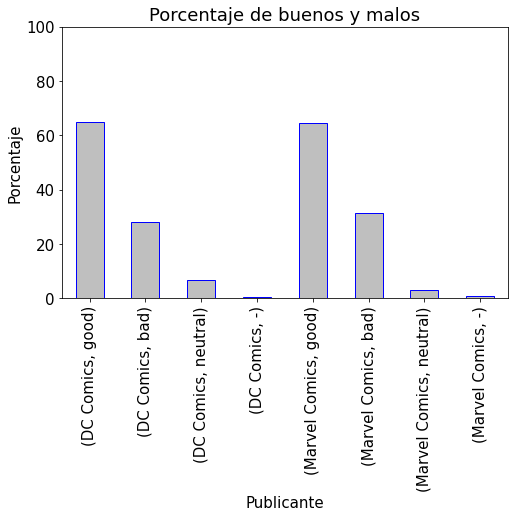

In [25]:
(df_master.groupby(df_master.Publisher).Alignment.value_counts(normalize = True)*100).plot(kind = 'bar', figsize = (8,5),
                                                                                           color = (0.5,0.5,0.5,0.5),
                                                                                           edgecolor = 'blue')
plt.title('Porcentaje de buenos y malos', fontsize = 18)
plt.ylabel('Porcentaje', fontsize = 15)
plt.xlabel('Publicante', fontsize = 15)
plt.ylim(0,100)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15);

Son muy parecidos los porcentajes entre DC y Marvel. En cada uno, prácticamente el 65% de los superhéroes son buenos. 

### Qué tal si ahora lo comparamos por género.

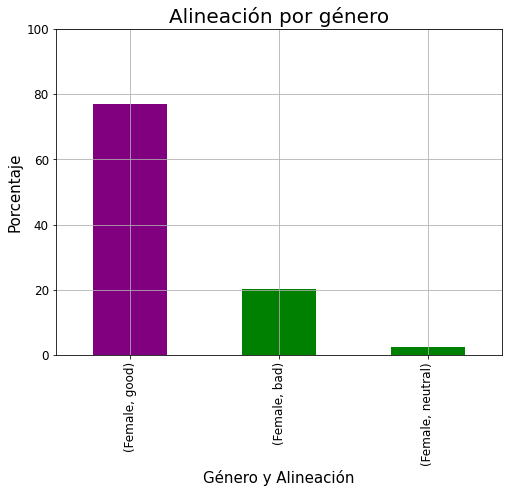

In [26]:
(df_master[df_master.Gender == 'Female'][['Gender', 'Alignment']].value_counts(normalize = True) * 100).plot(kind = 'bar', 
                                                                                                             figsize = (8, 6),
                                                                                                             color = ['purple', 'green', 'green'])
plt.xlabel('Género y Alineación', fontsize = 15)
plt.xticks(fontsize = 12)
plt.ylabel('Porcentaje', fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Alineación por género', fontsize = 20)
plt.ylim(0,100)
plt.grid(True);

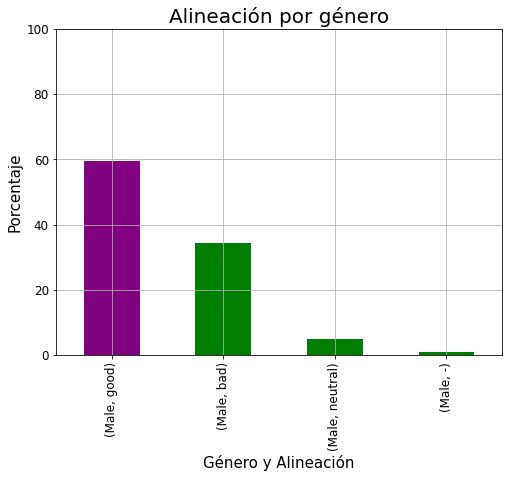

In [27]:
(df_master[df_master.Gender == 'Male'][['Gender', 'Alignment']].value_counts(normalize = True) * 100).plot(kind = 'bar', 
                                                                                                           figsize = (8, 6),
                                                                                                           color = ['purple', 'green', 'green', 'green'])
plt.xlabel('Género y Alineación', fontsize = 15)
plt.xticks(fontsize = 12)
plt.ylabel('Porcentaje', fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Alineación por género', fontsize = 20)
plt.ylim(0,100)
plt.grid(True);

Al parecer, las mujeres tienden a ser buenas y los hombres un poco malvados. También vemos que las mujeres en mayor cuantía deciden tomar un bando, es decir, tienen menos neutrales.

### Averiguemos ahora cuántos superpoderes tienen los superhéroes, cuáles son los superpoderes más comunes y los menos comunes.

Empezaremos creando una columna que haga el conteo de superpoderes pos superhéroe

In [28]:
df_master['num_poderes'] = df_master.select_dtypes(include = ['bool']).sum(axis = 1)

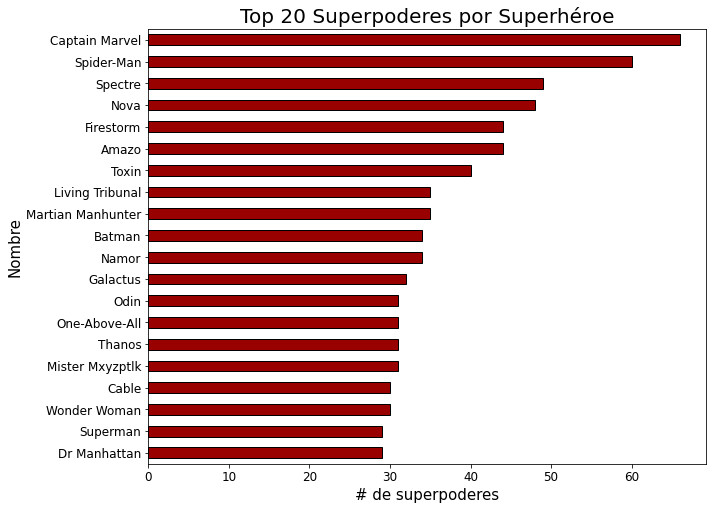

In [29]:
df_master.num_poderes.groupby(df_master.name).sum().sort_values().tail(20).plot(kind = 'barh', 
                                                                                figsize = (10,8),
                                                                                color = '#990000',
                                                                               edgecolor = 'black')
plt.title('Top 20 Superpoderes por Superhéroe', fontsize = 20)
plt.ylabel('Nombre', fontsize = 15)
plt.xlabel('# de superpoderes', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

😲 Captain Marvel tiene más de 60 superpoderes, vamos a darle una checada.

In [30]:
df_master[df_master.name == 'Captain Marvel'][df_master.columns[:10]]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
118,Captain Marvel,Female,blue,Human-Kree,Blond,1.80,Marvel Comics,-,good,33.565808
119,Captain Marvel,Male,blue,Human,Black,1.93,DC Comics,-,good,45.812792


Existen dos Captain Marvel, uno de cada sexo, de diferente raza, de diferente estatura, de diferente peso y de diferente publicante. Pero ¿cuál es el que tiene semejante cantidad de poderes?

In [31]:
df_master[df_master.name == 'Captain Marvel'].select_dtypes(include = ['bool']).sum(axis = 1)

118    33
119    33
dtype: int64

Al parecer la gráfica, al tener el mismo nombre, nos hizo la suma de los superpoderes, cada uno en realidad tiene 33 poderes.

In [32]:
df_master[df_master.name == 'Captain Marvel'][df_master.columns[11:]] 

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,num_poderes
118,True,True,False,False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,33
119,True,True,False,False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,33


Quiere decir que, aunque no tenemos datos duplicados, existen personajes que pueden estar en diferentes universos o que pueden tener el mismo nombre pero ser de otro publicante, como en el caso de Captain Marvel o tambien el caso de Spider-Man.

Si obtenemos los superhéroes que más superpoderes tienen (de forma individual), por ejemplo, Spider-Man ya ni siquiera figura en ese rango.

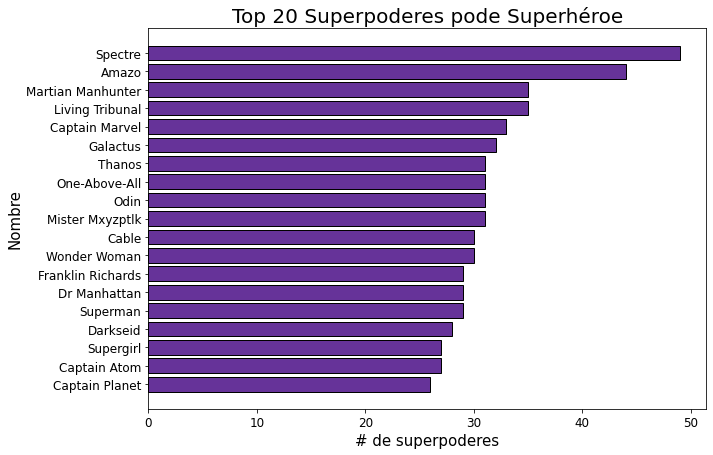

In [33]:
total_poderes = df_master[df_master.num_poderes > 25][['name', 'num_poderes']].sort_values('num_poderes', ascending = True).tail(20)
name = total_poderes['name']
poderes = total_poderes['num_poderes'] 
plt.figure(figsize = (10, 7)) 
plt.barh(name, 
         poderes, 
         color = '#663399', 
         edgecolor = 'black')
plt.title('Top 20 Superpoderes pode Superhéroe', fontsize = 20)
plt.xlabel('# de superpoderes', fontsize = 15)
plt.ylabel('Nombre', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show();

### Continuando con los superpoderes más y menos comunes...

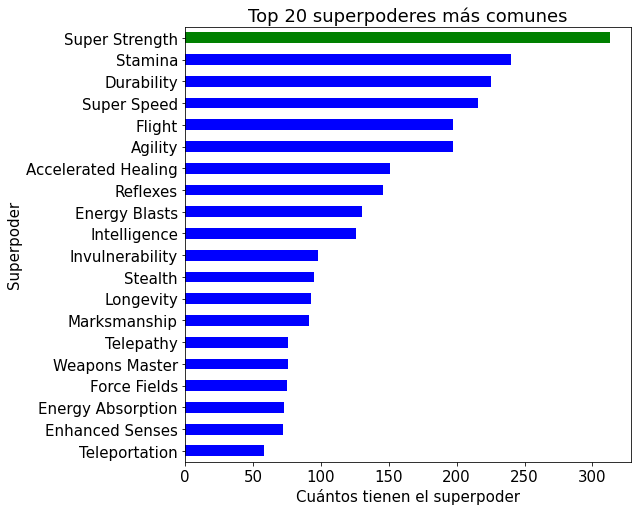

In [34]:
df_master[df_master.columns[11:-1]].sum().sort_values().tail(20).plot(kind = 'barh', 
                                                                    figsize = (8, 8), 
                                                                    color=['blue','blue','blue','blue','blue','blue','blue','blue',
                                                                          'blue','blue','blue','blue','blue','blue','blue','blue','blue','blue',
                                                                          'blue', 'green'])
plt.title('Top 20 superpoderes más comunes', fontsize = 18)
plt.ylabel('Superpoder', fontsize = 15)
plt.xlabel('Cuántos tienen el superpoder', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15);

Súper fuerza... ¡qué sorpresa!

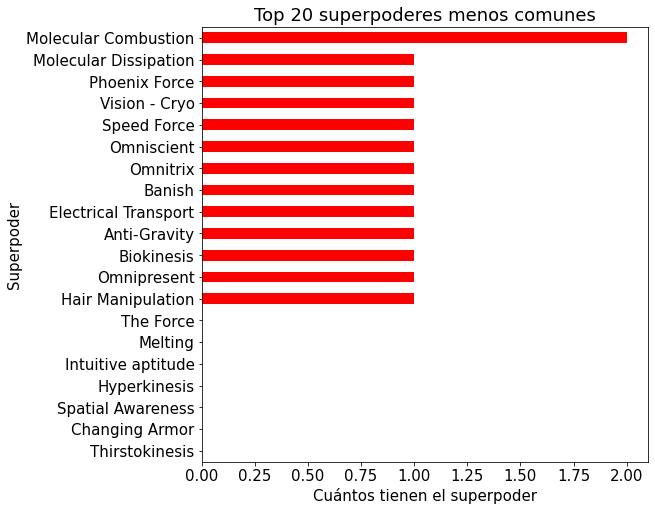

In [35]:
df_master[df_master.columns[11:-1]].sum().sort_values().head(20).plot(kind = 'barh', 
                                                                    figsize = (8, 8), 
                                                                    color='red')
plt.title('Top 20 superpoderes menos comunes', fontsize = 18)
plt.ylabel('Superpoder', fontsize = 15)
plt.xlabel('Cuántos tienen el superpoder', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15);

#### Hay algunos superpoderes que no pertenecen a nadie, probablemente porque decidimos limitarnos a los superhéroes de Marvel y DC, vamos a eliminarlos entonces.

In [36]:
df_master.drop(['The Force', 'Melting', 'Intuitive aptitude', 'Hyperkinesis', 'Spatial Awareness', 'Changing Armor', 'Thirstokinesis'],
               axis = 1,
               inplace = True)

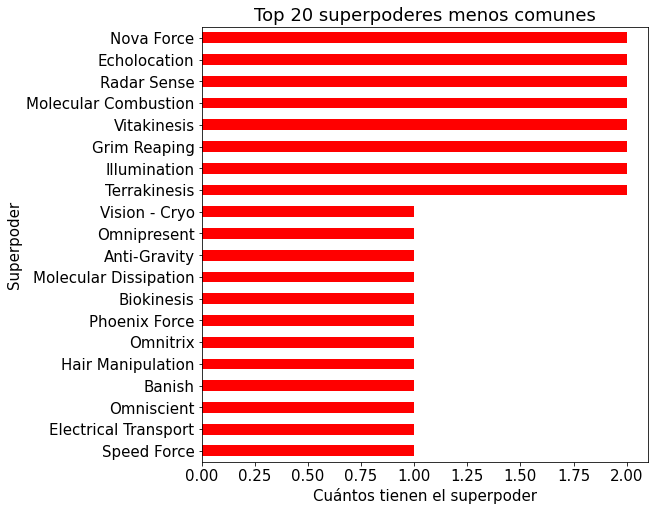

In [37]:
df_master[df_master.columns[11:]].sum().sort_values().head(20).plot(kind = 'barh', 
                                                                    figsize = (8, 8), 
                                                                    color='red')
plt.title('Top 20 superpoderes menos comunes', fontsize = 18)
plt.ylabel('Superpoder', fontsize = 15)
plt.xlabel('Cuántos tienen el superpoder', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15);

Graficamos de nuevo y obtenemos los superpoderes menos comunes.

### Volvamos a las comparaciones de género.

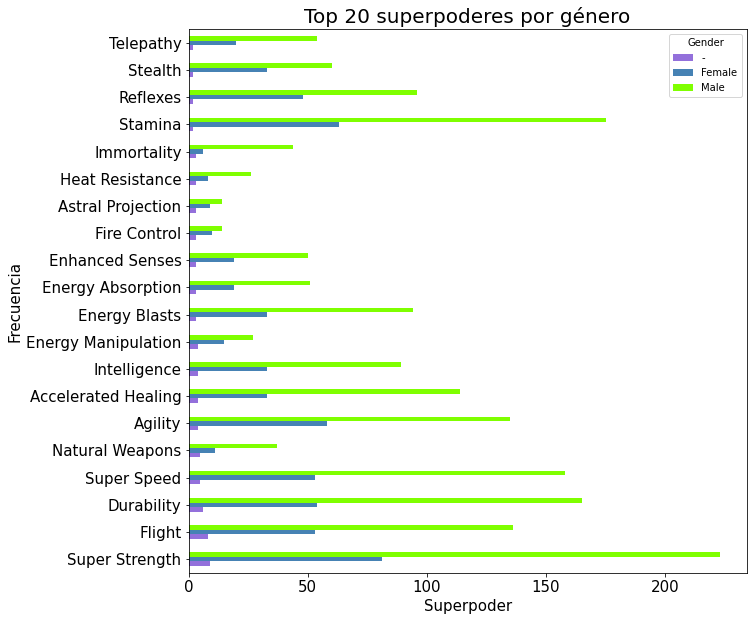

In [38]:
df_master.groupby(df_master.Gender)[df_master.columns[11:-1]].sum().T.sort_values(['-', 'Female', 'Male'], ascending = (False, False, False))\
.head(20).plot(kind = 'barh', figsize = (10, 10), color = ['mediumpurple', 'steelblue', 'chartreuse'])

plt.title('Top 20 superpoderes por género', fontsize = 20)
plt.ylabel('Frecuencia', fontsize = 15)
plt.xlabel('Superpoder', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15);

La súper fuerza y la stamina están presentes tanto en hombres como en mujeres como los 2 superpoderes más comunes, mientras que si tomamos en cuenta un tercer superpoder, en los hombres es la durabilidad y en mujeres es la agilidad. En personajes que no tienen un género definido, los más comunes son súper fuerza, la habilidad para volar y la durabilidad.

### Continuemos con las comparaciones. Ahora por alineación.

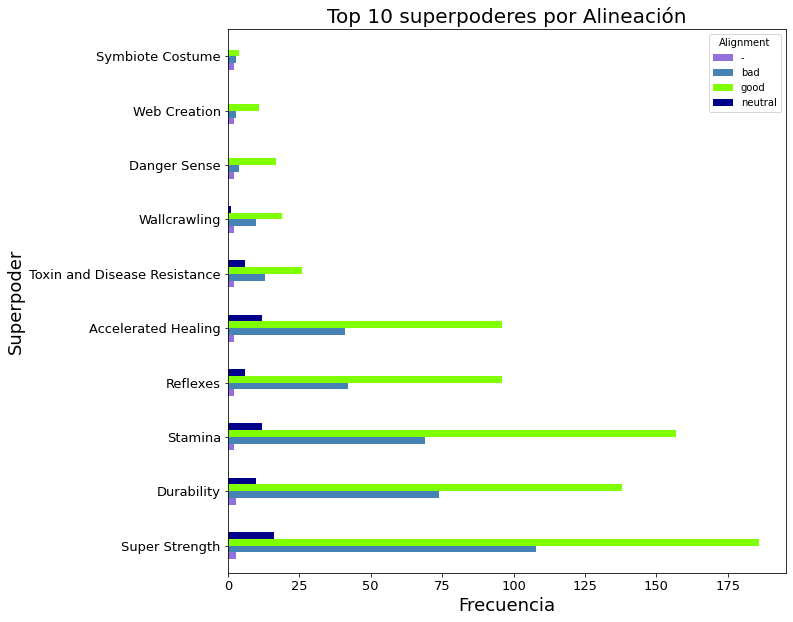

In [39]:
df_master.groupby(df_master.Alignment)[df_master.columns[11:-1]].sum().T\
.sort_values(['-', 'bad', 'good', 'neutral'], ascending = (False, False, False, False)).head(10).plot(kind = 'barh', 
                                                                                                      figsize = (10, 10), 
                                                                                                      color = ['mediumpurple', 'steelblue', 'chartreuse', 'darkblue'])

plt.title('Top 10 superpoderes por Alineación', fontsize = 20)
plt.ylabel('Superpoder', fontsize = 18)
plt.xlabel('Frecuencia', fontsize = 18)
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13);

Los buenos y los malos suelen tener los mismos superpoderes.

### Por último, veamos cómo se ve por Publicante

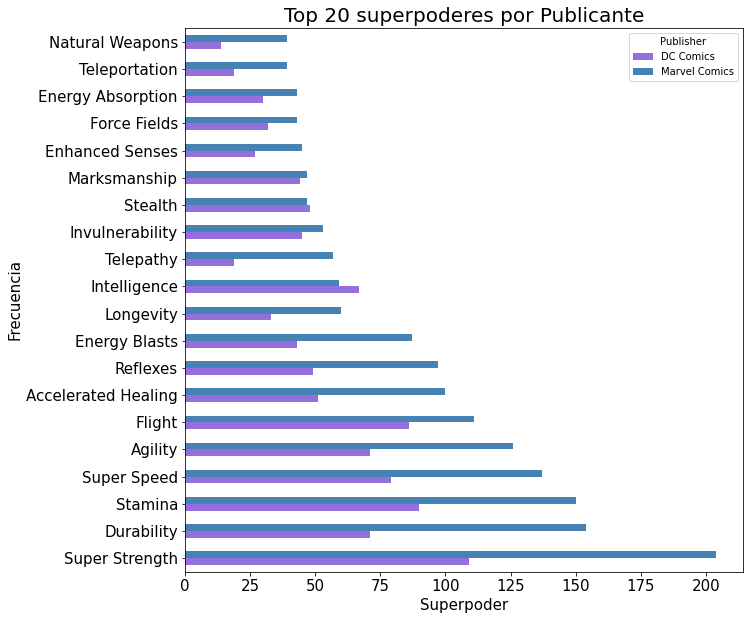

In [40]:
df_master.groupby(df_master.Publisher)[df_master.columns[11:-1]].sum().T.\
sort_values(['Marvel Comics', 'DC Comics'], ascending = (False, False)).head(20).plot(kind = 'barh', 
                                                                                      figsize = (10, 10), 
                                                                                      color = ['mediumpurple', 'steelblue'])

plt.title('Top 20 superpoderes por Publicante', fontsize = 20)
plt.ylabel('Frecuencia', fontsize = 15)
plt.xlabel('Superpoder', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15);

Los 3 superpoderes más comunes de Marvel son la súper fuerza, la durabilidad y la stamina. De DC son la súper fuerza, la stamina y la habilidad de volar

### Chequemos la dispersión de los datos.

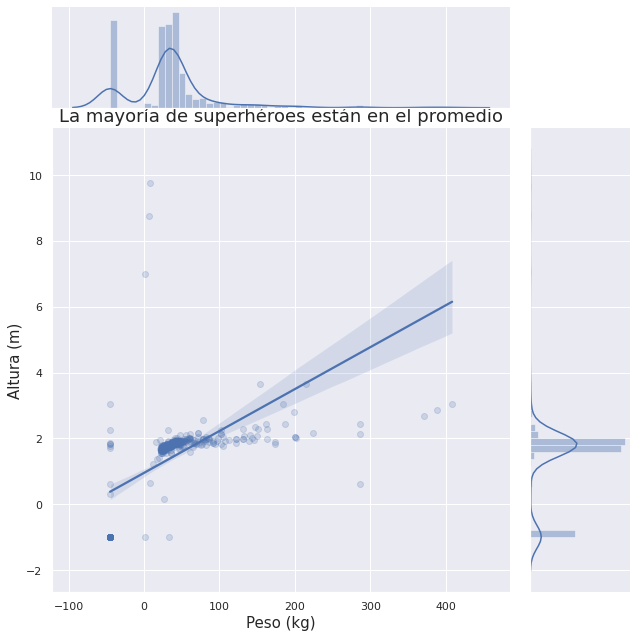

In [41]:
sns.set()
sns.jointplot(x = df_master.Weight, 
              y = df_master.Height, 
              data = df_master, 
              kind = 'reg', 
              height = 9, 
              ratio = 4, 
              scatter_kws = {'alpha': 0.2})
plt.title("La mayoría de superhéroes están en el promedio", fontsize = 18)
plt.xlabel("Peso (kg)",fontsize = 15)
plt.ylabel("Altura (m)",fontsize = 15);

Si googleamos el promedio de altura y peso de los estadounidenses, encontraremos que es 1.60 a 1.75 m de altura dependiendo si es hombre o mujer. En cuanto al peso, va de los 76.7 a los 88.9 kg. Aparentemente, los datos se concentran en este rango, pero si recordamos los estadísticos que se presentaron al inicio, el promedio de la altura es cerca de 1.30 y su mediana es de 1.80 (podemos apreciar varios outliers que nos disparan este dato. El promedio del peso es de 33 kg, es decir, los superhéroes son muy ligeros.

### Tenemos superhéroes bastante pesaditos...

In [42]:
df_master[df_master['Weight'] > 300][['name', 'Weight', 'Publisher']]

,name,Weight,Publisher
148,Darkseid,370.584664,DC Comics
268,Juggernaut,387.821160,Marvel Comics
413,Sasquatch,408.232800,Marvel Comics


<img src="imagenes_proyecto/Darkseid.png" width = 100> <img src="imagenes_proyecto/juggernaut.jpg" width = 150> <img src="imagenes_proyecto/sasquatch.jpg" width = 200>

### Y algunos otros muy altos

In [43]:
df_master[df_master['Height'] > 6][['name', 'Height', 'Publisher']]

,name,Height,Publisher
188,Fin Fang Foom,9.75,Marvel Comics
202,Galactus,8.76,Marvel Comics
223,Groot,7.01,Marvel Comics


<img src="imagenes_proyecto/finfangfoom.jpg" width = 345> <img src="imagenes_proyecto/Galactus.jpg" width = 160> <img src="imagenes_proyecto/groot.jpg" width = 150>

Parece ser que a DC no le agrada mucho la idea de tener personajes tan colosales los hace Marvel.

### Quitando los outliers se puede ver un poco mejor en dónde se concentra la mayor parte de los superhéroes

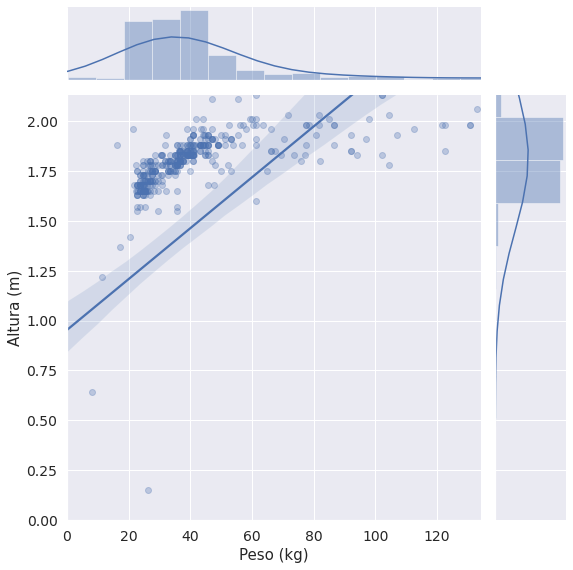

In [44]:
sns.jointplot(x = df_master.Weight, 
              y =df_master.Height, 
              data = df_master, 
              kind = 'reg', 
              xlim=(0,df_master['Weight'].quantile(0.95)), 
              ylim=(0, df_master['Height'].quantile(0.95)), 
              height= 8, 
              scatter_kws = {'alpha': 0.3})
plt.xlabel("Peso (kg)",fontsize = 15)
plt.ylabel("Altura (m)",fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);

Utilizando otro gráfico se sigue apreciando lo mismo, la concentración de superhéroes se encuentra en una altura de 1.75 m y 35 kg aproximadamente y hay otra sección que cae aproximadamente en 1.85 m de altura y unos 45 kg de peso. Los superhéroes son bastante livianos en su mayoría.

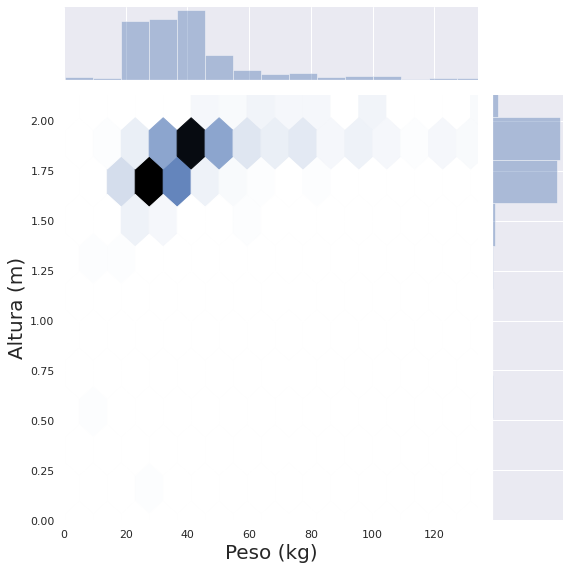

In [45]:
sns.jointplot(x = df_master.Weight, 
              y = df_master.Height, 
              data = df_master, 
              kind = 'hex',
              xlim = (0,df_master['Weight'].quantile(0.95)), ylim=(0, df_master['Height'].quantile(0.95)), 
              height = 8).set_axis_labels("Peso (kg)", "Altura (m)", fontsize = 20)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16);

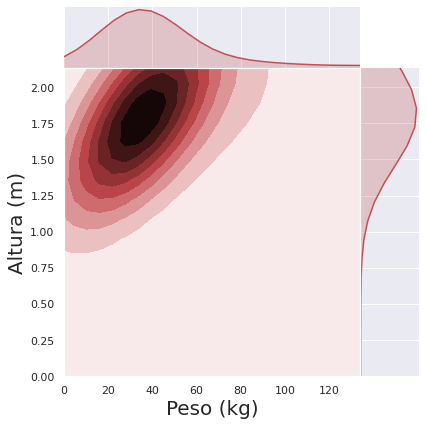

In [46]:
sns.jointplot(x = df_master.Weight, 
              y = df_master.Height, 
              data = df_master, 
              kind = 'kde', 
              xlim = (0,df_master['Weight'].quantile(0.95)),
              ylim = (0, df_master['Height'].quantile(0.95)),
              space=0,
              color="r").set_axis_labels("Peso (kg)", "Altura (m)", fontsize = 20)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

### Utilicemos algunos violin plots.

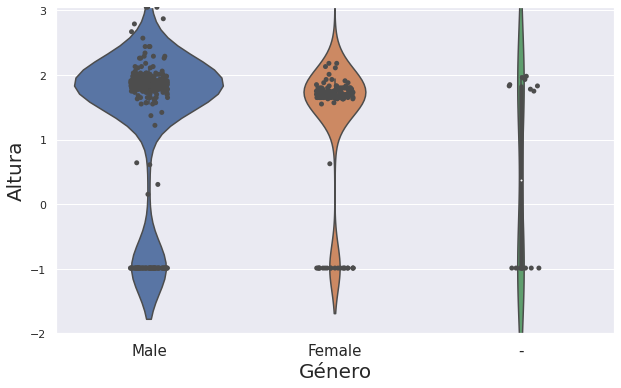

In [47]:
plt.figure(figsize = (10,6))
sns.violinplot(x = df_master.Gender, 
               y = df_master.Height, 
               data = df_master, 
               width = 0.8, 
               scale = 'count',
               palete = 'Set2')
sns.stripplot(x = df_master.Gender, 
              y = df_master.Height, 
              data = df_master, 
              color=".3")
plt.xlabel('Género', fontsize = 20)
plt.ylabel('Altura', fontsize = 20)
plt.xticks(np.arange(3), ('Male', 'Female', '-'), fontsize = 15)
plt.ylim(-2, df_master['Height'].quantile(0.99));

Los hombres tienden a ser más altos.

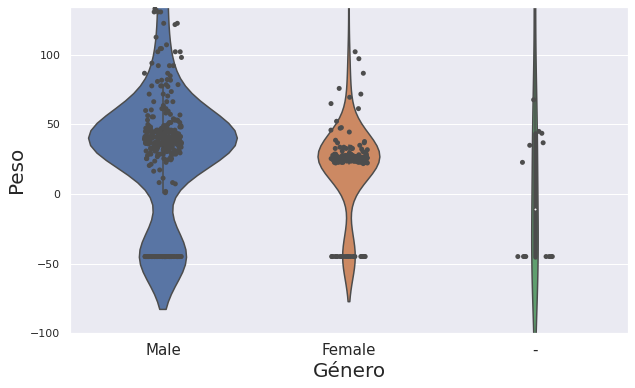

In [48]:
plt.figure(figsize = (10,6))
sns.violinplot(x = df_master.Gender, 
               y = df_master.Weight, 
               data = df_master, 
               width = 0.8, 
               scale = 'count')
sns.stripplot(x = df_master.Gender, 
              y = df_master.Weight, 
              data = df_master, 
              color=".3")
plt.xlabel('Género', fontsize = 20)
plt.ylabel('Peso', fontsize = 20)
plt.xticks(np.arange(3), ('Male', 'Female', '-'), fontsize = 15)
plt.ylim(-100, df_master['Weight'].quantile(0.95));

Los hombres tienden a ser más pesados.

### Comparemos los violin plots ahora por el publicante.

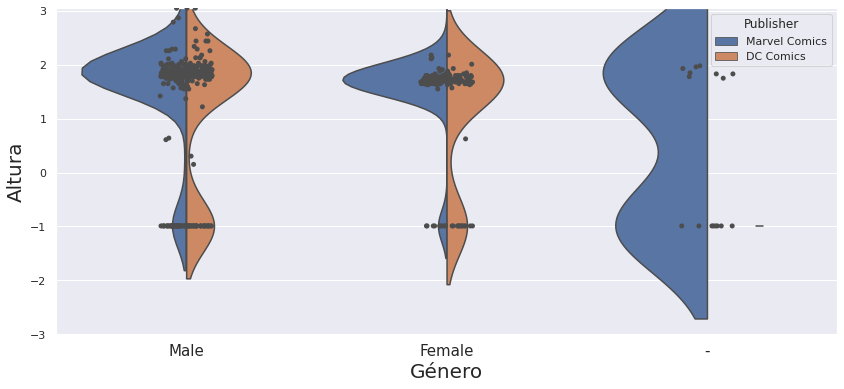

In [49]:
plt.figure(figsize = (14,6))
sns.violinplot(x = df_master.Gender, 
               y = df_master.Height, 
               data = df_master, 
               width = 0.8, 
               scale = 'count', 
               hue = 'Publisher', 
               split = True,
               palete = 'mako')
sns.stripplot(x = df_master.Gender, 
              y = df_master.Height, 
              data = df_master, 
              color=".3")
plt.xlabel('Género', fontsize = 20)
plt.ylabel('Altura', fontsize = 20)
plt.xticks(np.arange(3), ('Male', 'Female', '-'), fontsize = 15)
plt.ylim(-3, df_master['Height'].quantile(0.99));

Ya habiamos notado algo de esto anteriormente, los personajes de Marvel tienden a ser más altos que los de DC. También pareciera que los personajes asexuados son muchos, pero en el violin plot anterior, vemos que no. Además, DC no cuenta con personajes asexuados 🤔.

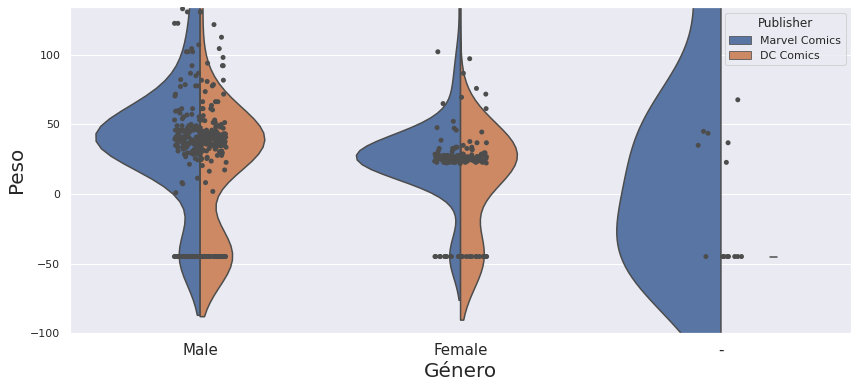

In [50]:
plt.figure(figsize = (14,6))
sns.violinplot(x = df_master.Gender, 
               y = df_master.Weight, 
               data = df_master, 
               width = 0.8, 
               scale = 'count', 
               hue = 'Publisher', 
               split = True)
sns.stripplot(x = df_master.Gender, 
              y = df_master.Weight, 
              data = df_master, 
              color=".3")
plt.xlabel('Género', fontsize = 20)
plt.ylabel('Peso', fontsize = 20)
plt.xticks(np.arange(3), ('Male', 'Female', '-'), fontsize = 15)
plt.ylim(-100, df_master['Weight'].quantile(0.95));

Los personajes de Marvel también tienden a ser más pesados. 

### Claramente la raza humana es la que más abunda (dejando de lado los registros que no conocemos su raza)

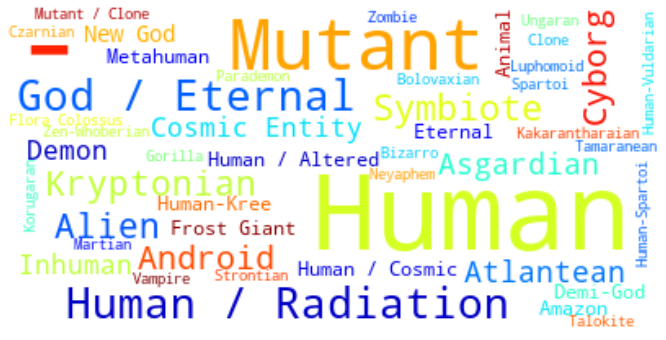

In [51]:
text = df_master.Race.value_counts()
wordcloud = WordCloud(max_font_size=70, 
                      max_words=50, 
                      background_color="white",
                      colormap="jet",
                      include_numbers=True).generate_from_frequencies(text)

plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

### El color de ojos preferido de los creadores es el azul

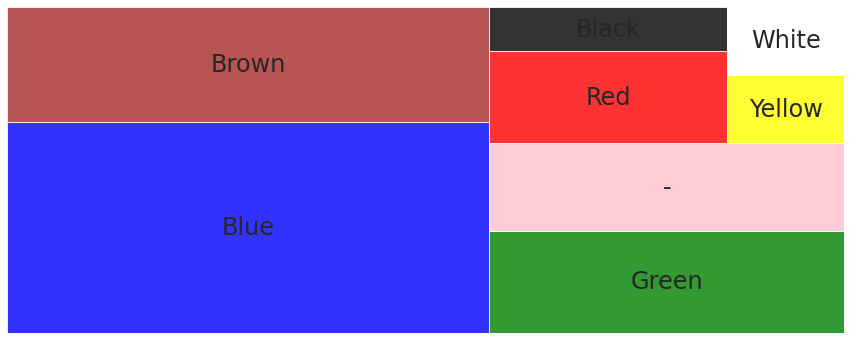

In [52]:
conteo = pd.DataFrame(df_master['Eye color'].value_counts()).head(8).reset_index()

sns.set(font_scale = 2)
plt.figure(figsize=(15,6))
squarify.plot(sizes = conteo['Eye color'], 
              label = ['Blue',
                       'Brown',
                       'Green',
                       '-',
                       'Red',
                       'Black',
                       'Yellow',
                       'White'],
              alpha=.8,
             color=["blue","brown","green", "pink", "red", "black", "yellow", 'white'])
plt.axis('off')
plt.show()

Tiene mucho sentido tomando en cuenta que son empresas estadounidenses.

### El color preferido de cabello de los creadores es el negro.

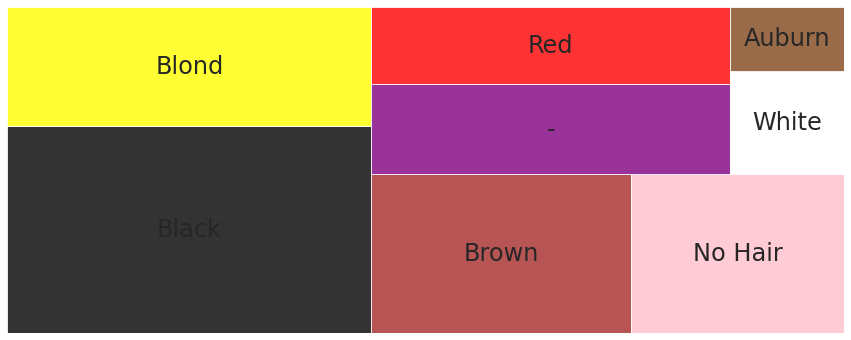

In [53]:
conteo2 = pd.DataFrame(df_master['Hair color'].value_counts()).head(8).reset_index()

sns.set(font_scale = 2)
plt.figure(figsize=(15,6))
squarify.plot(sizes = conteo2['Hair color'], 
              label = ['Black',
                       'Blond',
                       'Brown',
                       'No Hair',
                       '-',
                       'Red',
                       'White',
                       'Auburn'],
              alpha=.8,
             color=["black","yellow","brown", "pink", "purple", "red", "white", '#80461b'])
plt.axis('off')
plt.show()

Algunos podríamos haber pensado que el rubio es el color preferido, aunque no está muy lejos de serlo, es el segundo lugar.

# Tratamiento de los datos

Pandas nos da un error al tratar de modificar el df_master, por lo que vamos a crear una copia del mismo y vamos a trabajar sobre ese.

In [54]:
df_master_copy = df_master.copy(deep=True)

#### Reemplazamos los datos negativos por nulos en las columnas de peso y altura y vamos a imputarlos con la mediana

In [55]:
# Se reemplazan los datos indicados por datos nulos
df_master_copy.replace(-44.905608, np.nan, inplace=True)
df_master_copy.replace(-0.990, np.nan, inplace=True)

In [56]:
# Se establecen las columnas a imputar y el metodo a usar
h_w = df_master_copy[['Height','Weight']]
imputar = SimpleImputer(missing_values = np.nan, strategy="median")

imputing_values = imputar.fit_transform(h_w)
new_values = pd.DataFrame(imputing_values, columns=h_w.columns)

In [57]:
# Ya no hay nulos
new_values.isnull().sum()

Height    0
Weight    0
dtype: int64

In [58]:
# Se sustituyen las columnas imputadas por las originales
df_master_copy[['Height', 'Weight']] = new_values[['Height', 'Weight']]

In [59]:
df_master_copy.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,num_poderes
0,A-Bomb,Male,yellow,Human,No Hair,2.03,Marvel Comics,-,good,200.034072,...,False,False,False,False,False,False,False,False,False,7
1,Abin Sur,Male,blue,Ungaran,No Hair,1.85,DC Comics,red,good,40.823280,...,False,False,False,False,False,False,False,False,False,1
2,Abomination,Male,green,Human / Radiation,No Hair,2.03,Marvel Comics,-,bad,200.034072,...,False,False,False,False,False,False,False,False,False,8
3,Abraxas,Male,blue,Cosmic Entity,Black,1.83,Marvel Comics,-,bad,37.648136,...,False,False,False,False,False,False,False,False,False,14
4,Absorbing Man,Male,blue,Human,No Hair,1.93,Marvel Comics,-,bad,55.338224,...,False,False,False,False,False,False,False,False,False,11


In [60]:
# Checamos que ya no tengamos nulos
null_columns_copy = df_master_copy.columns[df_master_copy.isnull().any()]
df_master_copy[null_columns_copy].isnull().sum()

Series([], dtype: float64)

### ¿Recordamos el código para checar los datos que son '-'? 

In [61]:
for i in df_master_copy.columns:
    j = len(df_master_copy[df_master_copy[i] == '-'])
    if j > 0:
        print(i, j)

Gender 16
Eye color 58
Race 193
Hair color 58
Skin color 480
Alignment 4


De estas columnas, las que podrían tener relevancia son el género, la raza y la alineación. Por ejemplo, el género nos referimos a los asexuados. En la raza podría ser una raza desconocida y en la alineación tenemos que rellenar esos cuatro registros '-' de acuerdo a la información que encontramos en internet.

Por lo tanto, estas columnas no las vamos a modificar (con excepción de 'Alignment), en cuanto a color de ojos y color de cabello, los vamos a imputar con la moda. El color de piel lo vamos a dejar de lado porque tiene 480 datos faltantes y no tiene caso imputarlos, se tendrían que investigar todos.

Vamos a seguir el mismo procedimiento anterior.

In [62]:
df_master_copy['Eye color'].replace('-', np.nan, inplace=True)
df_master_copy['Hair color'].replace('-', np.nan, inplace=True)

In [63]:
e_h = df_master_copy[['Eye color','Hair color']]
imputar_e_h = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
e_h_values = imputar_e_h.fit_transform(e_h.iloc[:])
new_e_h = pd.DataFrame(e_h_values, columns = e_h.columns)

In [64]:
df_master_copy[['Eye color','Hair color']] = new_e_h[['Eye color','Hair color']]

In [65]:
df_master_copy.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,num_poderes
0,A-Bomb,Male,yellow,Human,No Hair,2.03,Marvel Comics,-,good,200.034072,...,False,False,False,False,False,False,False,False,False,7
1,Abin Sur,Male,blue,Ungaran,No Hair,1.85,DC Comics,red,good,40.823280,...,False,False,False,False,False,False,False,False,False,1
2,Abomination,Male,green,Human / Radiation,No Hair,2.03,Marvel Comics,-,bad,200.034072,...,False,False,False,False,False,False,False,False,False,8
3,Abraxas,Male,blue,Cosmic Entity,Black,1.83,Marvel Comics,-,bad,37.648136,...,False,False,False,False,False,False,False,False,False,14
4,Absorbing Man,Male,blue,Human,No Hair,1.93,Marvel Comics,-,bad,55.338224,...,False,False,False,False,False,False,False,False,False,11


Ahora rellenamos los cuatro registros en la columna de alineación.

De acuerdo a lo que encontramos en internet:
* Anti-Venom == Good
* Blackwulf == Good
* Trickster == Neutro
* Venompool == Neutro

In [66]:
df_master_copy[df_master_copy.Alignment == '-']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,num_poderes
21,Anti-Venom,Male,blue,Symbiote,Blond,2.29,Marvel Comics,-,-,162.385936,...,False,False,True,False,False,False,False,False,False,14
86,Blackwulf,Male,red,Alien,White,1.88,Marvel Comics,-,-,39.916096,...,False,False,False,False,False,False,False,False,False,4
494,Trickster,Male,blue,Human,Blond,1.83,DC Comics,-,-,36.740952,...,False,False,False,False,False,False,False,False,False,1
506,Venompool,Male,blue,Symbiote,Black,2.26,Marvel Comics,-,-,37.648136,...,False,False,True,False,False,False,False,False,False,26


In [67]:
indices = [21,86,494,506]
for i in indices:
    if df_master_copy.loc[[i]].name.any() == 'Anti-Venom' or df_master_copy.loc[[i]].name.any() == 'Blackwulf':
        df_master_copy.loc[i,'Alignment'] = 'good'
    else:
        df_master_copy.loc[i,'Alignment'] = 'neutral'

In [68]:
df_master_copy.loc[[21,86,494,506]]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,num_poderes
21,Anti-Venom,Male,blue,Symbiote,Blond,2.29,Marvel Comics,-,good,162.385936,...,False,False,True,False,False,False,False,False,False,14
86,Blackwulf,Male,red,Alien,White,1.88,Marvel Comics,-,good,39.916096,...,False,False,False,False,False,False,False,False,False,4
494,Trickster,Male,blue,Human,Blond,1.83,DC Comics,-,neutral,36.740952,...,False,False,False,False,False,False,False,False,False,1
506,Venompool,Male,blue,Symbiote,Black,2.26,Marvel Comics,-,neutral,37.648136,...,False,False,True,False,False,False,False,False,False,26


Si volvemos a correr nuestro código para checar los valores que son igual a '-' sólo se mantienen las columnas que dijimos no íbamos a modificar.

In [69]:
for i in df_master_copy.columns:
    j = len(df_master_copy[df_master_copy[i] == '-'])
    if j > 0:
        print(i, j)

Gender 16
Race 193
Skin color 480


### Ahora, vamos a aplicar un filtro para eliminar las columnas de superpoderes que no se usen mucho. Establecemos que si el superpoder no es usado por 20 o más superhéroes, entonces vamos a eliminar la columna.

In [70]:
# Identificamos las poderes que se usan por menos de 5 superheroes
for i in df_master_copy.columns[11:-1]:
    j = df_master_copy[i].sum()
    if j < 20:
       print(i,j)

Lantern Power Ring 11
Power Augmentation 7
Cryokinesis 18
Energy Armor 8
Duplication 15
Density Control 14
Astral Travel 4
Audio Control 8
Dexterity 5
Omnitrix 1
Possession 6
Electrokinesis 15
Darkforce Manipulation 7
Death Touch 7
Clairvoyance 5
Power Sense 3
Camouflage 17
Element Control 8
Electrical Transport 1
Projection 2
Summoning 4
Enhanced Memory 19
Anti-Gravity 1
Empathy 15
Power Nullifier 4
Radiation Control 4
Elasticity 8
Substance Secretion 15
Elemental Transmogrification 6
Technopath/Cyberpath 15
Photographic Reflexes 2
Seismic Power 3
Animation 5
Precognition 17
Fire Resistance 15
Power Absorption 11
Nova Force 2
Insanity 5
Animal Control 8
Intangibility 18
Enhanced Sight 16
Adaptation 2
Gliding 10
Mind Blast 11
Probability Manipulation 6
Gravity Control 15
Light Control 12
Echolocation 2
Toxin and Disease Control 6
Banish 1
Hair Manipulation 1
Illumination 2
Omnipotent 4
Cloaking 3
Power Cosmic 6
Biokinesis 1
Water Control 14
Radiation Immunity 11
Energy Resistance 7
Mol

### Eliminamos las columnas...

In [71]:
columns_to_delete = ['Astral Travel', 'Omnitrix', 'Power Sense', 'Electrical Transport', 'Projection', 'Summoning', 'Anti-Gravity', 'Power Nullifier', 
                     'Radiation Control', 'Photographic Reflexes', 'Seismic Power', 'Nova Force',  'Adaptation', 'Echolocation', 'Banish', 'Hair Manipulation', 
                     'Illumination', 'Omnipotent', 'Cloaking', 'Biokinesis', 'Molecular Combustion', 'Portal Creation', 'Sonar', 'Enhanced Touch', 
                     'Wind Control', 'Grim Reaping', 'Terrakinesis', 'Vitakinesis', 'Radar Sense', 'Qwardian Power Ring', 'Odin Force', 'Speed Force', 
                     'Phoenix Force', 'Molecular Dissipation', 'Vision - Cryo', 'Omnipresent', 'Omniscient', 
                     'Power Augmentation', 'Cryokinesis', 'Energy Armor', 'Duplication', 'Density Control', 
                     'Audio Control', 'Dexterity', 'Possession', 'Electrokinesis', 'Darkforce Manipulation', 
                     'Death Touch', 'Clairvoyance', 'Camouflage', 'Element Control', 'Enhanced Memory', 'Empathy', 
                     'Elasticity', 'Substance Secretion', 'Elemental Transmogrification', 'Technopath/Cyberpath', 
                     'Animation', 'Precognition', 'Fire Resistance', 'Power Absorption', 'Insanity', 'Animal Control', 
                     'Intangibility', 'Enhanced Sight', 'Gliding', 'Mind Blast', 'Probability Manipulation', 
                     'Gravity Control', 'Light Control', 'Toxin and Disease Control', 'Power Cosmic', 'Water Control', 
                     'Radiation Immunity', 'Energy Resistance', 'Omnilingualism', 'Magnetism', 'Mind Control Resistance', 
                     'Plant Control', 'Sonic Scream', 'Time Manipulation', 'Magic Resistance', 'Sub-Mariner', 
                     'Radiation Absorption', 'Vision - Microscopic', 'Vision - Infrared', 'Matter Absorption', 
                     'Resurrection', 'Vision - Heat', 'Weather Control', 'Vision - Thermal', 'Web Creation', 
                     'Reality Warping', 'Symbiote Costume']

for i in columns_to_delete:
    df_master_copy = df_master_copy.drop(columns = i)

### Pasamos de 172 a 78 columnas

In [72]:
df_master_copy.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Illusions,Vision - Telescopic,Toxin and Disease Resistance,Telepathy Resistance,Invisibility,Super Breath,Wallcrawling,Vision - Night,Vision - X-Ray,num_poderes
0,A-Bomb,Male,yellow,Human,No Hair,2.03,Marvel Comics,-,good,200.034072,...,False,False,False,False,False,False,False,False,False,7
1,Abin Sur,Male,blue,Ungaran,No Hair,1.85,DC Comics,red,good,40.823280,...,False,False,False,False,False,False,False,False,False,1
2,Abomination,Male,green,Human / Radiation,No Hair,2.03,Marvel Comics,-,bad,200.034072,...,False,False,False,False,False,True,False,False,False,8
3,Abraxas,Male,blue,Cosmic Entity,Black,1.83,Marvel Comics,-,bad,37.648136,...,False,False,False,False,False,False,False,False,False,14
4,Absorbing Man,Male,blue,Human,No Hair,1.93,Marvel Comics,-,bad,55.338224,...,False,False,False,False,False,False,False,False,False,11


#### Por último tiramos la columna de color de piel, como habíamos visto, casi no tiene registro y no tiene sentido tenerla.
#### También la columna de nombre porque no la vamos a usar y hay otra columna 'hero names' que se está colando.

In [73]:
df_master_copy = df_master_copy.drop(columns = ['name','Skin color', 'hero_names'])

## Apliquemos un Árbol de Decisión

En palabras simples, un árbol de decisión nos va a ayudar a clasificar a nuestros superhéroes y nos va a mostrar de manera gráfica los posibles eventos que pueden tener lugar a partir de una decisión que se tome al momento de la clasificación. Lo vamos a acompañar del índice de impureza de Gini que nos dirá la probabilidad de equivocarnos en clasificar un superhéroe si cae en cierto nodo.

#### Empecemos por transformar nuestras variables True y False de todas nuestras columnas de superpoderes por 1 y 0.
#### También tenemos que transformar nuestra variable a predecir, vamos a establecer que 1 es para Marvel y 0 es para Dc

In [74]:
df_master_copy[df_master_copy.columns[8:-1]] = df_master_copy[df_master_copy.columns[8:-1]].astype(int)

In [75]:
publicante = {'Marvel Comics': 1,'DC Comics': 0}
df_master_copy.Publisher = [publicante[item] for item in df_master_copy.Publisher] 

### Debemos transformar también nuestras variables categóricas a dummies para que el modelo funcione

In [76]:
dummi_cols = ['Gender', 'Eye color', 'Race', 'Hair color', 'Alignment']

In [77]:
# Valores posibles para las variables dummi
for i in dummi_cols:
    print(i, df_master_copy[i].nunique())

Gender 3
Eye color 21
Race 48
Hair color 28
Alignment 3


In [78]:
# Las guardamos en otro df para no perder estas variables
df_dummi = pd.get_dummies(df_master_copy[dummi_cols], drop_first=True)

In [79]:
df_model = df_master_copy.select_dtypes(include = 'number').join(df_dummi)
df_model

,Height,Publisher,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,...,Hair color_Red / Orange,Hair color_Red / White,Hair color_Silver,Hair color_Strawberry Blond,Hair color_White,Hair color_Yellow,Hair color_black,Hair color_blond,Alignment_good,Alignment_neutral
0,2.030,1,200.034072,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1.850,0,40.823280,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.030,1,200.034072,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.830,1,37.648136,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.930,1,55.338224,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,1.830,1,37.648136,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
533,1.650,1,23.586784,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
534,3.048,1,37.648136,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
535,1.700,0,25.854744,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Entrenamos

In [80]:
# Se excluye la variable a predecir Publisher
x = ['Height']+ df_model.columns[2:].tolist()

In [81]:
model_tree = DecisionTreeClassifier(max_depth = None)
model_tree.fit(df_model[x],df_model.Publisher)

DecisionTreeClassifier()

In [82]:
dot_data = export_graphviz(model_tree, out_file = None, 
                         feature_names = x,    
                         filled=True, rounded = True,
                         special_characters = True)
graph = graphviz.Source(dot_data)

In [83]:
with open("heroes_classifier.txt", "w") as f:
    f = export_graphviz(model_tree, out_file=f,
                             feature_names=x)

#### Como el árbol es demasiado grande para caber en este notebook, ponemos la página de [graphviz](http://webgraphviz.com/) para que se pueda consultar el archivo txt que generamos.

#### De cualquier forma, creo que es bastante complicado interpretar un árbol de semejante magnitud, por lo que pasaremos a elaborar otros modelos.

## Importancia relativa

In [84]:
# Las variables importantes se ponen en un dataframe
f_imp = pd.DataFrame(model_tree.feature_importances_, 
                     index=x, 
                     columns=['imp'])

In [85]:
# Se calcula la importancia relativa
f_imp['imp_rel'] = (f_imp/f_imp.max()*100)

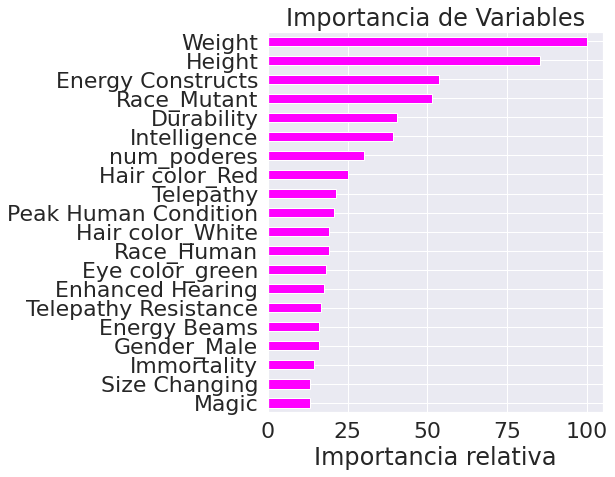

In [86]:
f_imp.sort_values('imp_rel',ascending=True).imp_rel.tail(20).plot.barh(figsize=(6,7),
                                                              title='Importancia de Variables',
                                                              color='magenta')
plt.xlabel('Importancia relativa');

La mayor importancia podemos decir que recae en las primeras 2 variables del gráfico. La más destacable es la de peso, ya habíamos mencionado antes que a DC no le gusta hacer personajes tan colosales como a Marvel. Le sigue la altura, la capacidad de convertir la energía en herramientas y si es mutante.

## Segundo entrenamiento

Este método se va a hacer por medio de la "entropía". La RAE lo define como el grado de desorden de un sistema, cosa que puede hacer enojar a un físico... pues tiene que ver más con el concepto de probabilidad. Si imaginamos un jarrón que se rompe en muchos pedazos, la probabilidad de que esos pedazos se vuelvan a unir es bajísima, pero no hay una ley que indique que no se pueda. No soy físico y por lo tanto no me voy a meter a definir el concepto como tal, entonces vamos a quedarnos con lo que dice la RAE.

<img src = "imagenes_proyecto/entropia.jpg">

In [87]:
# Dividimos nuestros datos en prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(df_model[x], 
                                                    df_model.Publisher, 
                                                    test_size = 0.2, 
                                                    random_state = 69)

In [88]:
model_tree = DecisionTreeClassifier(max_depth = None, criterion = 'entropy')
model_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [89]:
y_hat_tree = model_tree.predict(X_test)
y_hat_tree_proba = model_tree.predict_proba(X_test)

In [90]:
print(classification_report(y_test,y_hat_tree))

              precision    recall  f1-score   support

           0       0.38      0.52      0.44        25
           1       0.84      0.75      0.79        83

    accuracy                           0.69       108
   macro avg       0.61      0.63      0.62       108
weighted avg       0.73      0.69      0.71       108



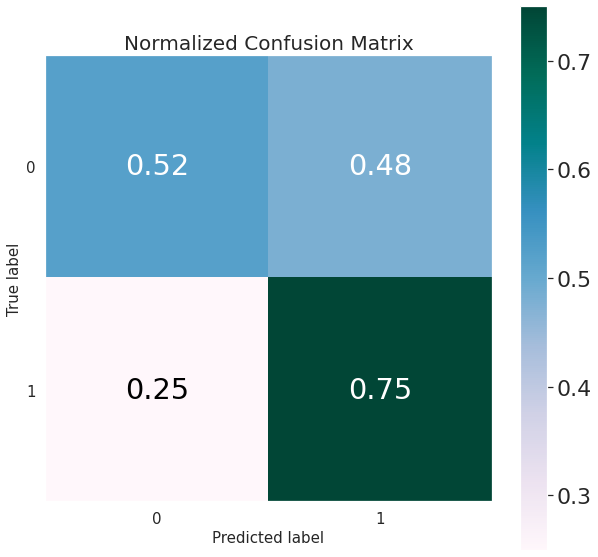

In [91]:
skplt.metrics.plot_confusion_matrix(y_test,y_hat_tree,normalize=True,
                                    text_fontsize='larger',
                                    figsize = (10, 10),
                                    cmap = 'PuBuGn')
plt.title('Normalized Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted label', fontsize = 15)
plt.ylabel('True label', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

## Random Forest

El Bosque Aleatorio básicamente es una construcción de N árboles de decisión tomando muestras de nuestros datos de entrenamiento, se hace un promedio de la predicción de todos los árboles y el resultado será la predicción del Bosque Aleatorio.

In [92]:
model_rf = RandomForestClassifier(n_estimators = 100, max_depth = None, criterion = 'entropy')
model_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [93]:
y_hat_rf = model_rf.predict(X_test)
y_hat_rf_proba = model_rf.predict_proba(X_test)

In [94]:
print(classification_report(y_test,y_hat_rf))

              precision    recall  f1-score   support

           0       0.58      0.56      0.57        25
           1       0.87      0.88      0.87        83

    accuracy                           0.81       108
   macro avg       0.73      0.72      0.72       108
weighted avg       0.80      0.81      0.80       108



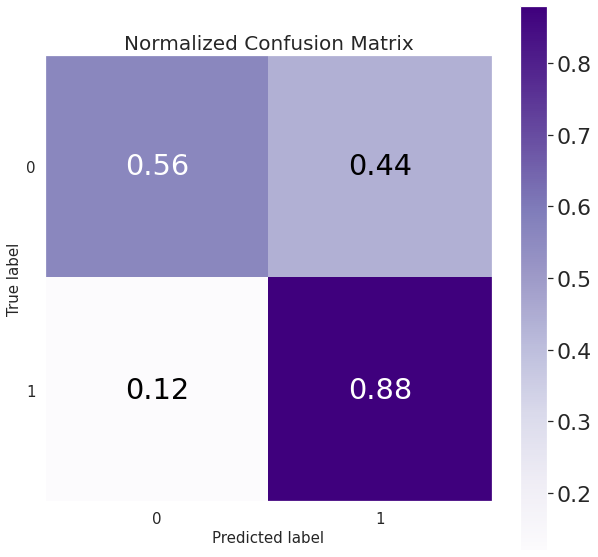

In [95]:
skplt.metrics.plot_confusion_matrix(y_test,y_hat_rf,
                                    normalize=True,
                                    text_fontsize='larger',
                                    figsize = (10, 10),
                                    cmap = 'Purples')
plt.title('Normalized Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted label', fontsize = 15)
plt.ylabel('True label', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

In [96]:
# Las variables importantes se ponen en un dataframe
f_imp1 = pd.DataFrame(model_rf.feature_importances_, 
                     index=x, 
                     columns=['imp'])

In [97]:
# Se calcula la importancia relativa
f_imp1['imp_rel1'] = (f_imp1/f_imp1.max()*100)

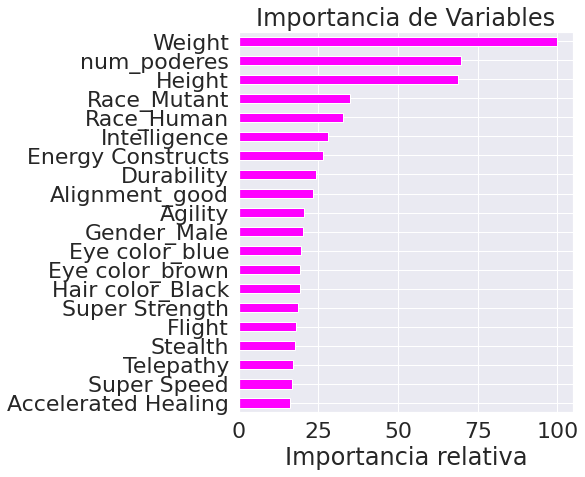

In [98]:
f_imp1.sort_values('imp_rel1',ascending=True).imp_rel1.tail(20).plot.barh(figsize=(6,7),
                                                              title='Importancia de Variables',
                                                              color='magenta')
plt.xlabel('Importancia relativa');

Con el RF obtenemos que las variables de importancia son el peso (de nuevo), el número de poderes y la altura.

## GBM

Como nos los definieron en el curso, el GBM es como un RF pero con esteroides. Básicamente, crea una serie de predictores y en cada nuevo predictor, trabaja con los resultados del anterior para irlo mejorando.

Apliquemos ahora un GBM para ver qué tal nos va

In [99]:
gbrt_heroes = GradientBoostingClassifier(max_depth = None, n_estimators = 100, 
                                 learning_rate = 1.0, random_state = None)
gbrt_heroes.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=None)

Elaboremos otro GBM con más estimadores y menor tasa de aprendizaje

In [100]:
gbrt_slow_heroes = GradientBoostingClassifier(max_depth = None, n_estimators = 200, 
                                              learning_rate = 0.1, random_state = None)
gbrt_slow_heroes.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=None, n_estimators=200)

Estas son las predicciones de los dos GBM

In [101]:
y_pred_heroes = [modelo.predict(X_test) for modelo in (gbrt_heroes, gbrt_slow_heroes)]
y_pred_heroes

[array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0]),
 array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])]

Si los comparamos con nuestra 'y' real obtenemos esto, pero ¿cómo sabemos qué tan bien clasificó el modelo?

In [102]:
y_pred_heroes + [y_test.values]

[array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0]),
 array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

Pues apliquemos un accuracy_score

In [103]:
y_pred_heroes1 = gbrt_heroes.predict(X_test)

In [104]:
y_pred_heroes2 = gbrt_slow_heroes.predict(X_test)

In [105]:
predictions1 = [value for value in y_pred_heroes1]
predictions2 = [value for value in y_pred_heroes2]
accuracy1 = accuracy_score(y_test, predictions1)
accuracy2 = accuracy_score(y_test, predictions2)
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))

Accuracy: 66.67%
Accuracy: 74.07%


El primer modelo con valores en default nos dio una precisión de 66% aproximadamente mientras que el segundo modelo nos dio una precisión de 74%.

Como el segundo modelo salió un poco mejor, vamos a checarlo más a fondo.

In [106]:
print(classification_report(y_test,y_pred_heroes2))

              precision    recall  f1-score   support

           0       0.44      0.44      0.44        25
           1       0.83      0.83      0.83        83

    accuracy                           0.74       108
   macro avg       0.64      0.64      0.64       108
weighted avg       0.74      0.74      0.74       108



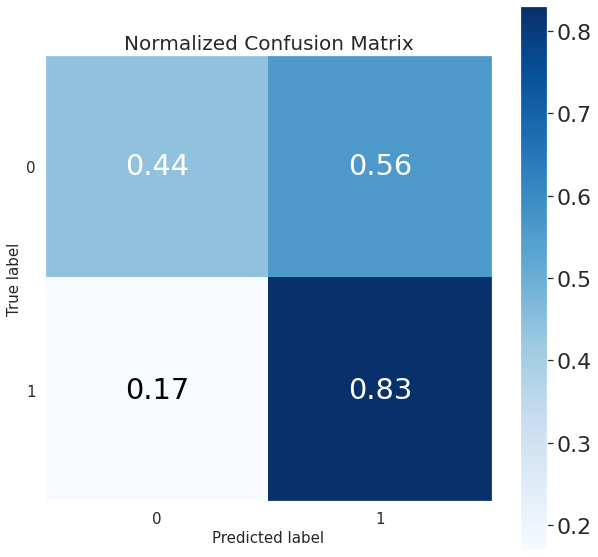

In [107]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_heroes2,
                                    normalize=True,
                                    text_fontsize='larger',
                                    figsize = (10, 10))
plt.title('Normalized Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted label', fontsize = 15)
plt.ylabel('True label', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

### GridSearch con GBM

Lo que hará el GS es buscar la mejor combinación de los parámetros que le proporcionamos a nuestro modelo.

In [108]:
params_grid_gbm = {'max_depth': [1, 10, 100, 1000], 'n_estimators': [1, 10, 100, 200, 1000],
                     'learning_rate': [0.1, 0.5, 1, 2], 'random_state': [0, 1, 10, 100, 1000]}

In [109]:
gbrt_gs = GridSearchCV(GradientBoostingClassifier(), params_grid_gbm, cv=3)
gbrt_gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1, 2],
                         'max_depth': [1, 10, 100, 1000],
                         'n_estimators': [1, 10, 100, 200, 1000],
                         'random_state': [0, 1, 10, 100, 1000]})

In [110]:
print('Best score for training data:', gbrt_gs.best_score_,"\n") 

print('Best max_depth:',gbrt_gs.best_estimator_.max_depth) 
print('Best n_estimators:',gbrt_gs.best_estimator_.n_estimators)
print('Best learning_rate:',gbrt_gs.best_estimator_.learning_rate)
print('Best randome_state:',gbrt_gs.best_estimator_.random_state)

Best score for training data: 0.7156177156177156 

Best max_depth: 1
Best n_estimators: 200
Best learning_rate: 0.1
Best randome_state: 0


In [111]:
final_model_gbm = gbrt_gs.best_estimator_
y_pred_gsgbm = final_model_gbm.predict(X_test)

In [112]:
print(classification_report(y_test,y_pred_gsgbm))

              precision    recall  f1-score   support

           0       0.53      0.40      0.45        25
           1       0.83      0.89      0.86        83

    accuracy                           0.78       108
   macro avg       0.68      0.65      0.66       108
weighted avg       0.76      0.78      0.77       108



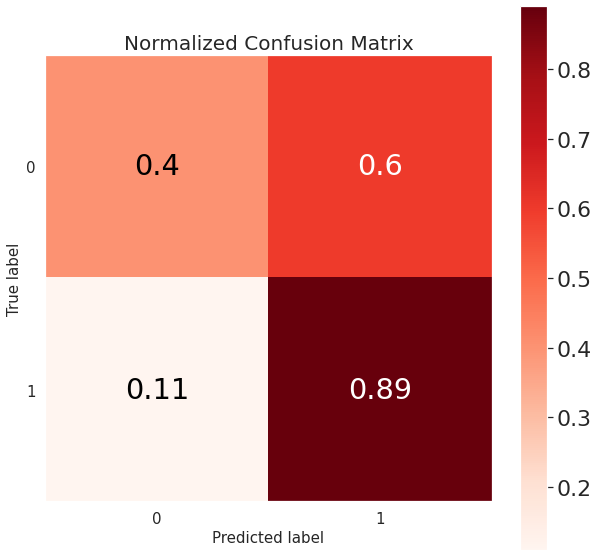

In [113]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_gsgbm,
                                    normalize=True,
                                    text_fontsize='larger',
                                    figsize = (10, 10),
                                    cmap = 'Reds')
plt.title('Normalized Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted label', fontsize = 15)
plt.ylabel('True label', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

# SVM

Lo que trata de hacer este modelo en cuanto a clasificación, es implementar una frontera que sea la más adecuada para dividir nuestros datos, a partir de que encuentra los dos puntos más difíciles de clasificar. Algo así como encontrar al superhéroe de DC que más se parece a los de Marvel y viceversa.

<img src = "imagenes_proyecto/svm.png">

In [114]:
svm_model = SVC(kernel='linear', C = 1)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [115]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.68      0.60        25
           1       0.89      0.82      0.86        83

    accuracy                           0.79       108
   macro avg       0.71      0.75      0.73       108
weighted avg       0.81      0.79      0.80       108



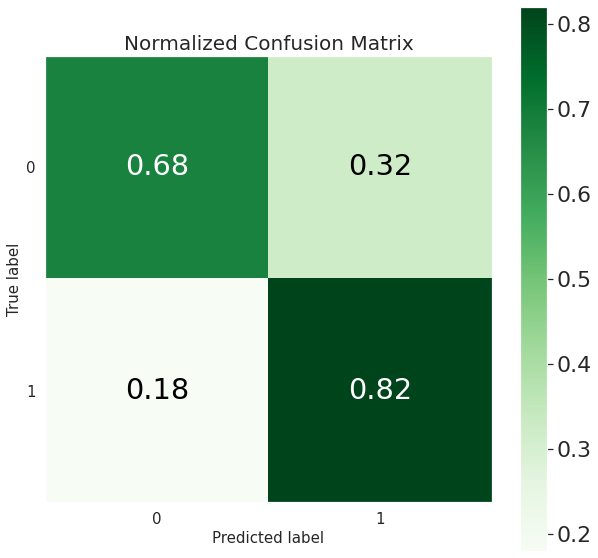

In [116]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred,
                                    normalize=True,
                                    text_fontsize='larger',
                                    figsize = (10, 10),
                                    cmap = 'Greens')
plt.title('Normalized Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted label', fontsize = 15)
plt.ylabel('True label', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

### GS con SVM

In [117]:
params_grid = [{'kernel': ['rbf'], 'gamma': ['scale', 'auto'],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
              {'kernel': ['sigmoid'], 'gamma': ['scale', 'auto'],
                     'C': [1, 10, 100, 1000]}]

In [118]:
svm_model_gs = GridSearchCV(SVC(), params_grid, cv=3)
svm_model_gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': ['scale', 'auto'],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': ['scale', 'auto'],
                          'kernel': ['sigmoid']}])

In [119]:
print('Best score for training data:', svm_model_gs.best_score_,"\n") 

print('Best C:',svm_model_gs.best_estimator_.C) 
print('Best Kernel:',svm_model_gs.best_estimator_.kernel)
print('Best Gamma:',svm_model_gs.best_estimator_.gamma)

Best score for training data: 0.6876456876456877 

Best C: 1
Best Kernel: linear
Best Gamma: scale


In [120]:
final_model = svm_model_gs.best_estimator_
y_pred_gssvm = final_model.predict(X_test)

In [121]:
print(classification_report(y_test,y_pred_gssvm))

              precision    recall  f1-score   support

           0       0.53      0.68      0.60        25
           1       0.89      0.82      0.86        83

    accuracy                           0.79       108
   macro avg       0.71      0.75      0.73       108
weighted avg       0.81      0.79      0.80       108



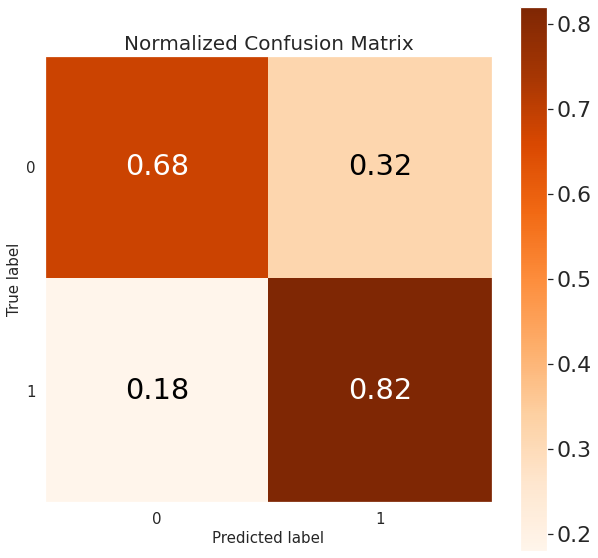

In [122]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_gssvm,
                                    normalize=True,
                                    text_fontsize='larger',
                                    figsize = (10, 10),
                                    cmap = 'Oranges')
plt.title('Normalized Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted label', fontsize = 15)
plt.ylabel('True label', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

# Conclusiones

El mejor modelo fue el SVM, a pesar de que en algunos modelos la clasificación de Marvel Comics fue más alta, el SVM subió la clasificación de los superhéroes de DC Comics.

Inicialmente, en el modelo de SVM se tiene que estandarizar las variables, pero nos dimos cuenta de que la precisión en la clasificación disminuía, por lo que se optó por dejar las variables así.

Se intentó hacer también un undersample y un oversample. El undersample mejoraba la predicción de DC a 79% pero baja la de Marvel a 59%, el oversample no mejoraba nada. Por estas razones, se decidió omitir en la presentación.